In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
lung-and-colon-cancer-histopathological-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!unzip "/content/lung-and-colon-cancer-histopathological-images.zip" -d "/content/uncompressed"

Streaming output truncated to the last 5000 lines.
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: /content/uncompressed/lung_colon_image_set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
import os
import PIL
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_colon = '/content/uncompressed/lung_colon_image_set/colon_image_sets'

In [ ]:
import pathlib
data_c = pathlib.Path(data_colon)
data_c

PosixPath('/content/uncompressed/lung_colon_image_set/colon_image_sets')

In [ ]:
image_count = len(list(data_c.glob('*/*.jpeg')))
print(image_count)

10000


In [ ]:
image_count = len(list(data_l.glob('*/*.jpeg')))
print(image_count)

15000


In [ ]:
colon= list(data_c.glob('colon_n/*'))
colon[:5]

[PosixPath('/content/uncompressed/lung_colon_image_set/colon_image_sets/colon_n/colonn255.jpeg'),
 PosixPath('/content/uncompressed/lung_colon_image_set/colon_image_sets/colon_n/colonn748.jpeg'),
 PosixPath('/content/uncompressed/lung_colon_image_set/colon_image_sets/colon_n/colonn3754.jpeg'),
 PosixPath('/content/uncompressed/lung_colon_image_set/colon_image_sets/colon_n/colonn3982.jpeg'),
 PosixPath('/content/uncompressed/lung_colon_image_set/colon_image_sets/colon_n/colonn683.jpeg')]

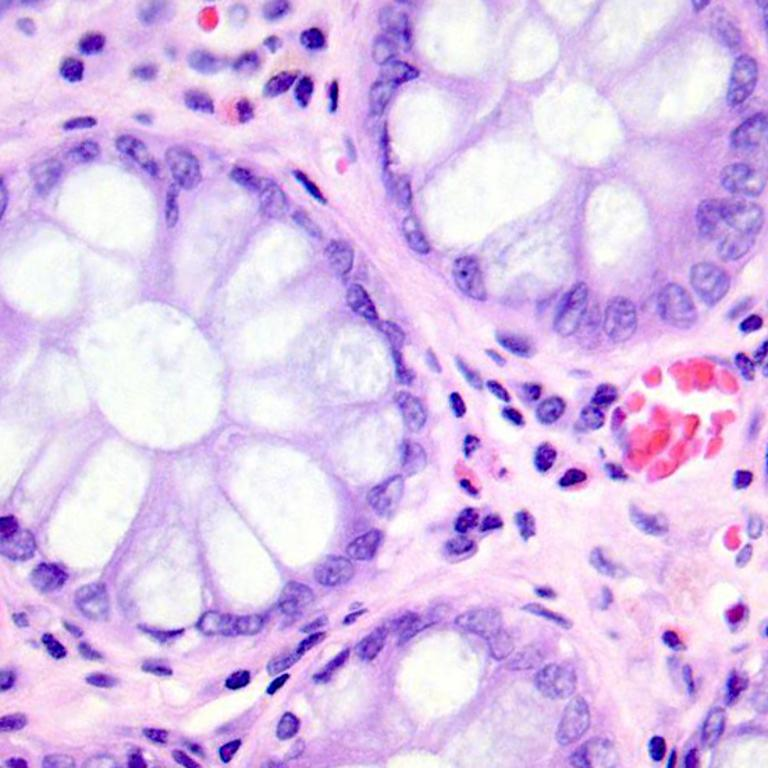

In [ ]:
PIL.Image.open(str(colon[7]))

In [ ]:
colon_image_dict = {
    'colon_aca': list(data_c.glob('colon_aca/*'))[:2500],
    'colon_n': list(data_c.glob('colon_n/*'))[:2500],
}


In [ ]:
colon_labels_dict = {
    'colon_aca': 0,
    'colon_n': 1,
}

In [ ]:
x,y= [], []
for colon_name, images in colon_image_dict.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(180,180))
      x.append(resized_img)
      y.append(colon_labels_dict[colon_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x, y, random_state=0)

In [ ]:
import numpy as np

x_train_c = np.array(x_train_c)
x_test_c = np.array(x_test_c)

training_images = x_train_c / 255

test_images = x_test_c / 255

In [ ]:
num_classes = 2

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, y_train_c, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


118/118 [==============================] - 119s 997ms/step - loss: 0.6726 - accuracy: 0.6904
Epoch 2/10
118/118 [==============================] - 118s 1s/step - loss: 0.4899 - accuracy: 0.7515
Epoch 3/10
118/118 [==============================] - 116s 988ms/step - loss: 0.5489 - accuracy: 0.6957
Epoch 4/10
118/118 [==============================] - 118s 993ms/step - loss: 0.5161 - accuracy: 0.7589
Epoch 5/10
118/118 [==============================] - 116s 987ms/step - loss: 0.4300 - accuracy: 0.8245
Epoch 6/10
118/118 [==============================] - 117s 987ms/step - loss: 0.3711 - accuracy: 0.8357
Epoch 7/10
118/118 [==============================] - 114s 966ms/step - loss: 0.2929 - accuracy: 0.8784
Epoch 8/10
118/118 [==============================] - 117s 987ms/step - loss: 0.1811 - accuracy: 0.9347
Epoch 9/10
118/118 [==============================] - 113s 961ms/step - loss: 0.1875 - accuracy: 0.9243
Epoch 10/10
118/118 [==============================] - 118s 1s/step - loss: 0.

In [ ]:
model.evaluate(test_images, y_test_c)

40/40 [==============================] - 12s 289ms/step - loss: 0.2267 - accuracy: 0.9152


[0.2266792505979538, 0.9151999950408936]